In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import iqr
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
#Import dataset 
df = pd.read_csv("creditcard.csv", delimiter=',')

# take a look at the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()
#identify data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# summarize the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.isnull().values.any()
#check for any nan

False

0    284315
1       492
Name: Class, dtype: int64


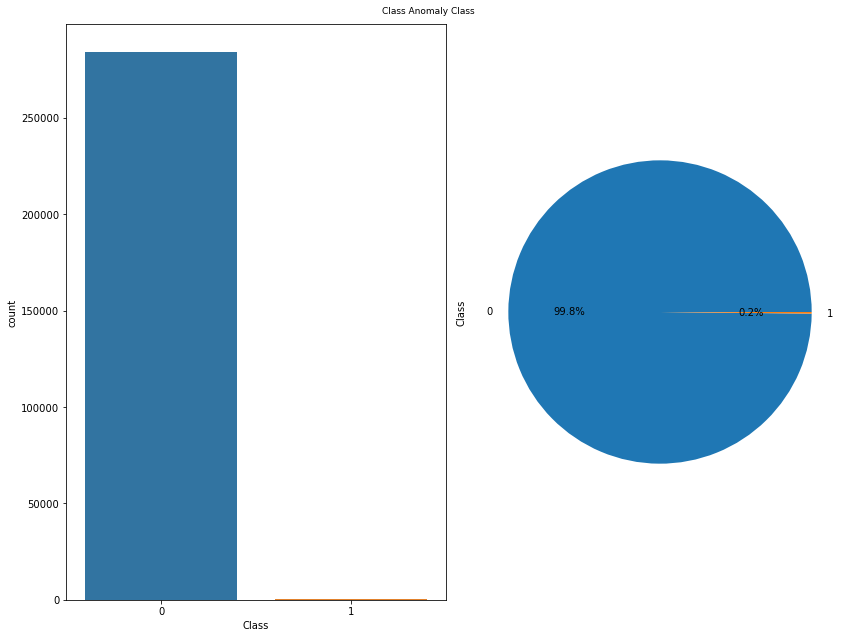

In [7]:
#users count by class
print(df.Class.value_counts())
#
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,9))
    f.suptitle(d.name+' Anomaly Class',fontsize=9)
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
plot_uni_cat(df['Class'])

### Subsample
The reason behind subsampling is the fear of overfitting given over 95% of the dataset is of non-fraud. Therefore in predict fraud class "1" this might be difficult. Therefore to somewhat balance the equation a subsample of the master dataset is used whereby there is a 33% (1/3) representation of both class which in turns leads to a better prediction.

In [8]:
# Since most of the data we have has already been scaled, we scale the columns we have got left

from sklearn.preprocessing import StandardScaler, RobustScaler

#Robust Scaler is less prone to outliers

std_scaler= StandardScaler()
rob_scaler=RobustScaler()

df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [10]:
df=df.sample(frac=1)

fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:1000]
normal_distributed_df=pd.concat([fraud_df,non_fraud_df])

#Shuffle DataFrame rows
new_df=normal_distributed_df.sample(frac=1, random_state=42)
#With random_state=42 , we get the same train and test sets across different executions, but in this time, 
#the train and test sets are different from the previous case with random_state=0 .
#The train and test sets directly affect the model's performance score.
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
64556,-0.022515,0.890924,1.599339,0.814390,0.308688,-0.338620,0.682645,-0.345844,-0.650954,0.147516,...,-0.377519,-0.073248,-0.085553,-0.605985,0.273947,-0.026156,-0.075474,0,-0.393496,-0.293579
108675,-0.824452,1.207814,1.359790,1.047196,-0.000661,-0.235516,0.201264,0.446742,-0.959215,-0.511193,...,0.259148,-0.131458,0.090195,-0.036976,-0.288860,0.030461,0.032402,0,-0.160646,-0.237686
2576,-2.519263,2.743810,-0.386796,-0.078128,-0.364604,0.901335,-2.818384,-7.135379,-0.845599,-1.504561,...,-0.813935,0.701449,-0.576936,-0.094135,0.112955,0.201986,0.060340,0,-0.970183,-0.279746
81175,1.032444,-0.303905,1.306257,0.764405,-0.938261,0.386295,-0.738779,0.314176,0.588121,-0.139457,...,0.215751,0.046101,0.272582,0.128665,0.312537,0.027844,0.020963,0,-0.303986,0.169636
251448,2.034698,0.355648,-1.926590,1.207847,0.803390,-0.648072,0.335850,-0.311382,0.212544,-0.219126,...,0.314513,-0.111347,-1.094903,0.337825,-0.475145,0.025191,-0.023627,0,0.830097,0.110389


0    1000
1     492
Name: Class, dtype: int64


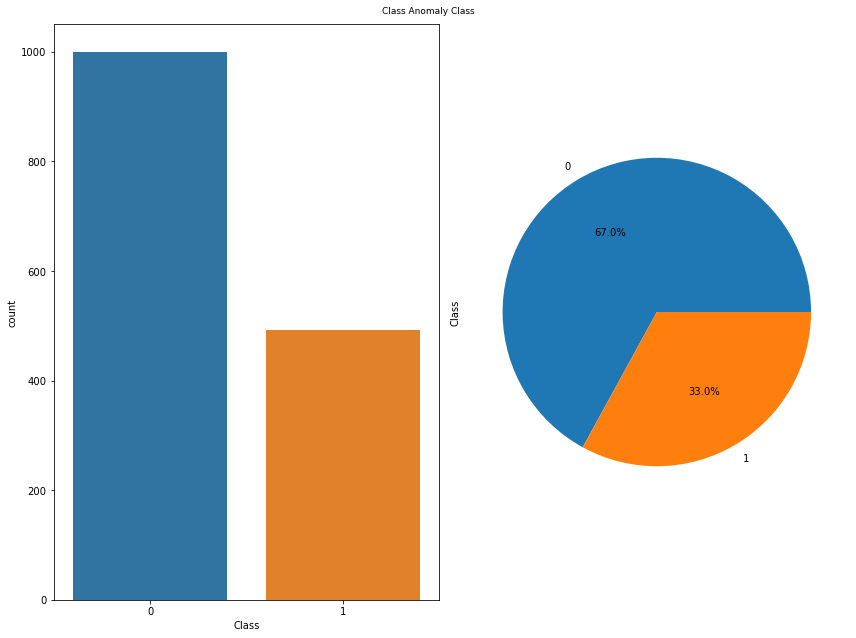

In [11]:
#users count by class after sampling
print(new_df.Class.value_counts())
#
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,9))
    f.suptitle(d.name+' Anomaly Class',fontsize=9)
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
plot_uni_cat(new_df['Class'])

In [12]:
#correlation matrix
corr = new_df.corr()
corr



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
V1,1.000000,-0.757190,0.849103,-0.598258,0.826080,0.302872,0.856875,-0.079701,0.644575,0.733664,...,-0.045008,-0.024268,-0.045086,-0.065206,0.025871,0.182590,0.146677,-0.474070,0.217003,-0.071227
V2,-0.757190,1.000000,-0.813366,0.648215,-0.750025,-0.270352,-0.817135,-0.014248,-0.666866,-0.751332,...,-0.009655,0.126874,-0.010622,0.125919,0.021635,-0.093398,-0.017758,0.520651,-0.192208,-0.280506
V3,0.849103,-0.813366,1.000000,-0.753820,0.822698,0.425779,0.873989,-0.166793,0.740090,0.855727,...,-0.060546,-0.021028,0.028734,-0.088167,-0.019891,0.079832,0.101470,-0.618146,0.079695,-0.046789
V4,-0.598258,0.648215,-0.753820,1.000000,-0.569686,-0.392446,-0.702652,0.101527,-0.742777,-0.782313,...,0.114913,0.015310,-0.068427,0.013272,0.113697,0.006569,-0.035400,0.727692,-0.187720,0.034633
V5,0.826080,-0.750025,0.822698,-0.569686,1.000000,0.271183,0.809057,-0.198426,0.633384,0.745237,...,-0.082904,-0.072668,-0.087069,-0.096494,0.038425,0.158752,0.154410,-0.416429,0.255692,-0.145396
V6,0.302872,-0.270352,0.425779,-0.392446,0.271183,1.000000,0.283293,-0.491241,0.336365,0.406874,...,0.012986,0.260175,-0.021034,-0.087162,-0.040008,-0.156201,-0.038690,-0.400358,0.075590,0.163564
V7,0.856875,-0.817135,0.873989,-0.702652,0.809057,0.283293,1.000000,0.071997,0.731208,0.859456,...,-0.108833,-0.077088,-0.022490,0.032541,0.015568,0.182641,0.132125,-0.527827,0.188889,0.131863
V8,-0.079701,-0.014248,-0.166793,0.101527,-0.198426,-0.491241,0.071997,1.000000,-0.078388,-0.064312,...,0.017038,-0.392775,0.055883,0.198973,0.035736,0.279179,-0.009105,0.070545,-0.123043,-0.002383
V9,0.644575,-0.666866,0.740090,-0.742777,0.633384,0.336365,0.731208,-0.078388,1.000000,0.811896,...,-0.205647,-0.036728,0.009224,-0.029883,-0.108845,0.080836,0.107250,-0.583661,0.140238,-0.020906
V10,0.733664,-0.751332,0.855727,-0.782313,0.745237,0.406874,0.859456,-0.064312,0.811896,1.000000,...,-0.191578,-0.044913,0.018304,-0.001458,-0.036824,0.108535,0.100618,-0.673931,0.188718,-0.017737


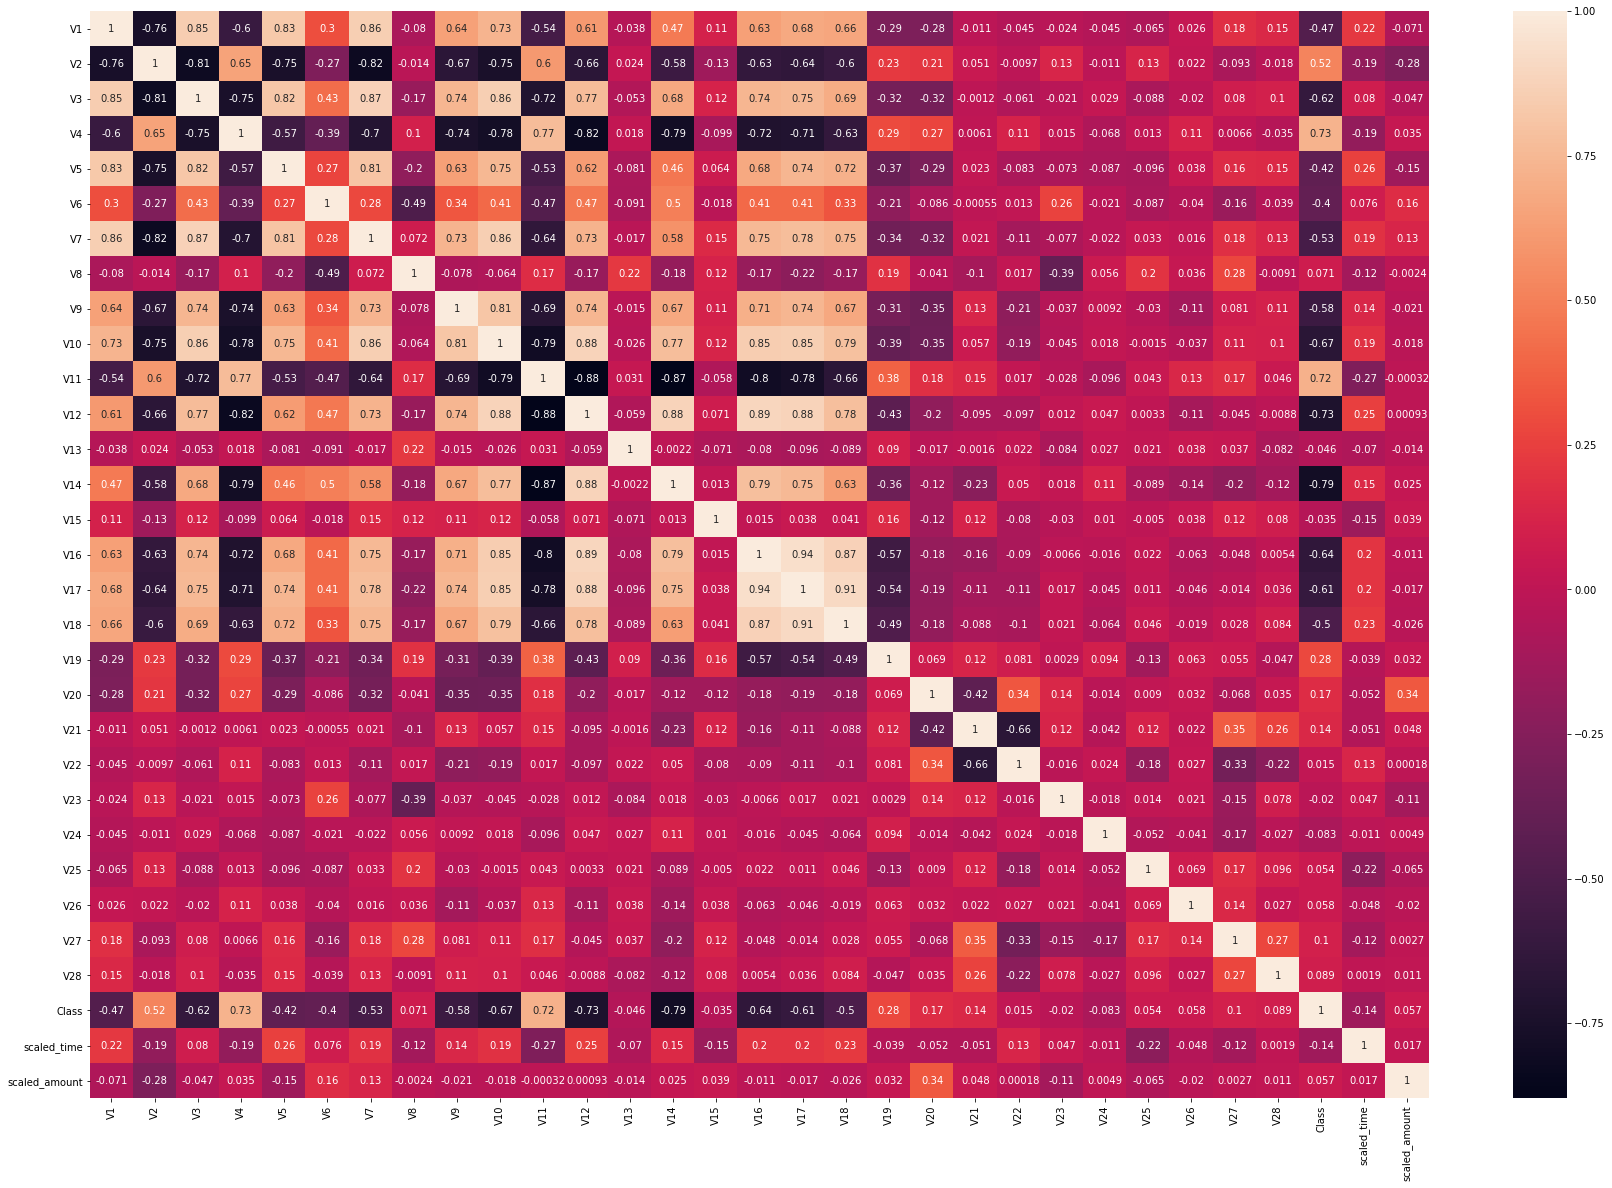

In [13]:
#corr matrix graph
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True)
plt.show()

The above correlation scores, shows the level of influence on the different features. Relating to the Class(i.e fraud anomaly) it can be identified V10, V12, V14, V16 have the highest negative correlation on class, whereas V4, V11, V2 have the highest positive correlation.

**BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.**

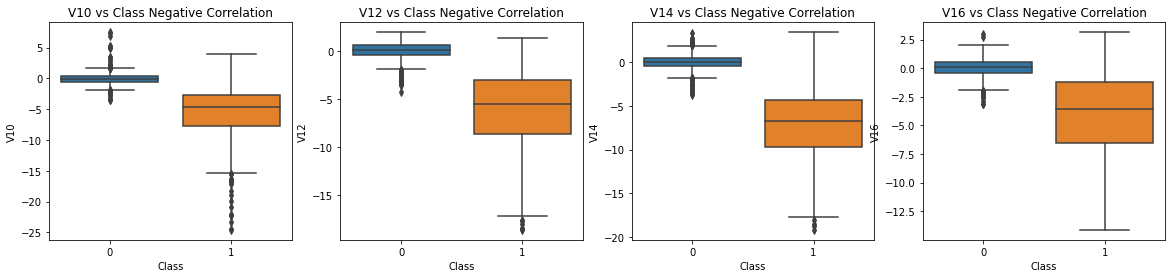

In [14]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=new_df,  ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=new_df,  ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V16", data=new_df,  ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')



plt.show()

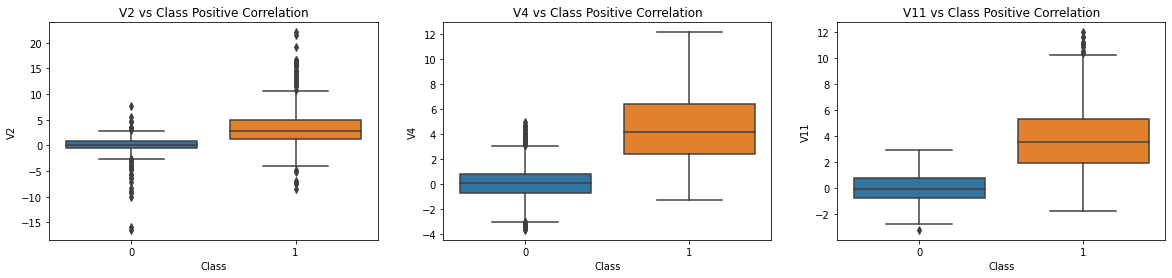

In [15]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))


# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=new_df,  ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df,  ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

plt.show()

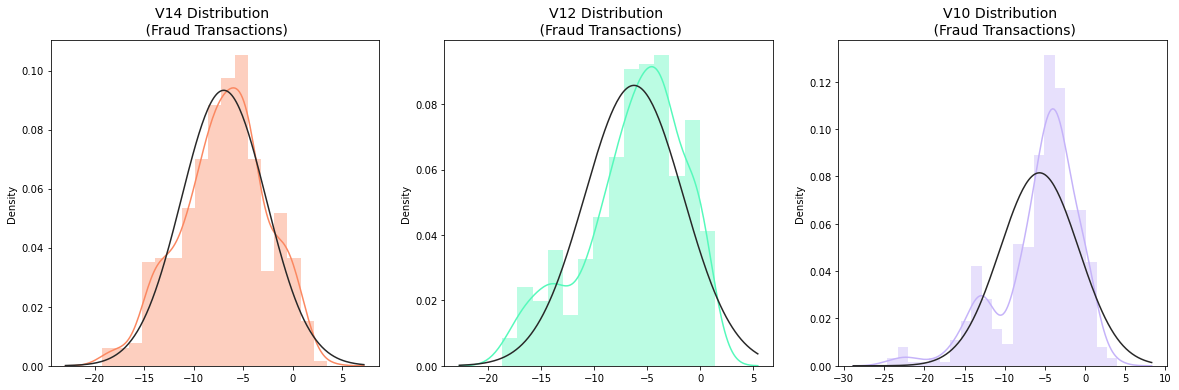

In [16]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### ML techniques applied

* Logistic Regression. 

* KNN. 

* DecisionTree. 

* Random Forest.

* Support Vector Machine.



In [17]:
#defining our X and Y variable(s) 
X = new_df.drop('Class', axis=1)
y = new_df['Class']




In [18]:
#separate the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1044, 30) (1044,)
Test set: (448, 30) (448,)


### Logistic Regression

In [19]:
#modeling training using Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [20]:
#model prediction with test data
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [21]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[5.08378889e-01, 4.91621111e-01],
       [8.08417808e-01, 1.91582192e-01],
       [7.73320239e-01, 2.26679761e-01],
       [6.36008556e-07, 9.99999364e-01],
       [7.70159666e-01, 2.29840334e-01],
       [8.33291688e-01, 1.66708312e-01],
       [8.20815386e-01, 1.79184614e-01],
       [7.51911596e-01, 2.48088404e-01],
       [7.76685904e-01, 2.23314096e-01],
       [7.06902605e-01, 2.93097395e-01],
       [4.13340067e-07, 9.99999587e-01],
       [8.03881713e-01, 1.96118287e-01],
       [8.09449799e-01, 1.90550201e-01],
       [8.29398275e-01, 1.70601725e-01],
       [3.51964735e-01, 6.48035265e-01],
       [2.36535698e-04, 9.99763464e-01],
       [8.34789116e-01, 1.65210884e-01],
       [7.65436459e-01, 2.34563541e-01],
       [8.31545623e-01, 1.68454377e-01],
       [6.69449145e-01, 3.30550855e-01],
       [8.30730793e-01, 1.69269207e-01],
       [2.35500340e-04, 9.99764500e-01],
       [3.72778135e-02, 9.62722186e-01],
       [8.32137902e-01, 1.67862098e-01],
       [7.472676

In [22]:
#model evaluation with usage of Jacard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9305993690851735

In [23]:
from sklearn import metrics
from sklearn.metrics import jaccard_score,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,yhat))
print("Accuracy:",metrics.accuracy_score(y_test,yhat))
print("Precision:",metrics.precision_score(y_test,yhat))
print("Recall:",metrics.recall_score(y_test,yhat))
print("F1-Score:",metrics.f1_score(y_test,yhat))

Confusion Matrix:
 [[295   5]
 [ 17 131]]
Accuracy: 0.9508928571428571
Precision: 0.9632352941176471
Recall: 0.8851351351351351
F1-Score: 0.9225352112676056


In [24]:
#model evaluation with usage of confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[131  17]
 [  5 295]]


Confusion matrix, without normalization
[[131  17]
 [  5 295]]


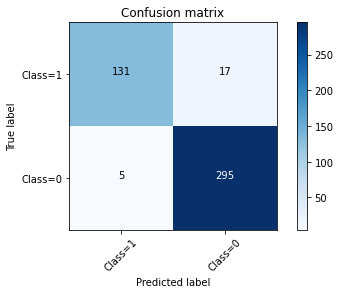

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Class=1','Class=0'],normalize= False,  title='Confusion matrix')

### Knearest neighbour 

In [26]:
#Predicition using Knearest neighbour 
from sklearn.neighbors import KNeighborsClassifier
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [27]:
k_yhat = neigh.predict(X_test)
k_yhat[0:5]

array([0, 0, 0, 1, 0])

In [28]:
from sklearn import metrics
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,k_yhat))
print("Accuracy: ", metrics.accuracy_score(y_test, k_yhat))
print("Precision:",metrics.precision_score(y_test,k_yhat))
print("Recall:",metrics.recall_score(y_test,k_yhat))
print("F1-Score:",metrics.f1_score(y_test,k_yhat))

Confusion Matrix:
 [[295   5]
 [ 22 126]]
Accuracy:  0.9397321428571429
Precision: 0.9618320610687023
Recall: 0.8513513513513513
F1-Score: 0.903225806451613


Confusion matrix, without normalization
[[126  22]
 [  5 295]]


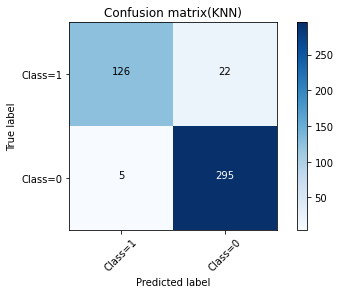

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, k_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Class=1','Class=0'],normalize= False,  title='Confusion matrix(KNN)')

In [30]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95, 0.96, 0.95, 0.95, 0.94, 0.94, 0.94, 0.94, 0.95])

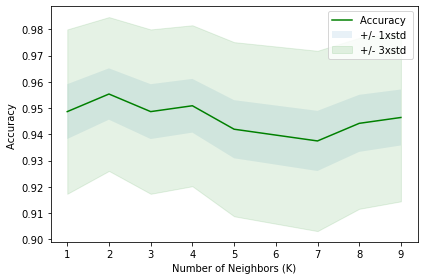

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Decision Tree 

In [32]:
from sklearn.tree  import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_features=6 , max_depth=4)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [33]:
dt.score(X_train , y_train).round(5)

0.95785

In [34]:
dt.score(X_test , y_test).round(5)

0.94196

In [35]:
DT_yhat=dt.predict(X_test)

In [36]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,DT_yhat))
print("Accuracy: ", metrics.accuracy_score(y_test, DT_yhat))
print("Precision:",metrics.precision_score(y_test,DT_yhat))
print("Recall:",metrics.recall_score(y_test,DT_yhat))
print("F1-Score:",metrics.f1_score(y_test,DT_yhat))

Confusion Matrix:
 [[297   3]
 [ 23 125]]
Accuracy:  0.9419642857142857
Precision: 0.9765625
Recall: 0.8445945945945946
F1-Score: 0.9057971014492753


### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(max_features=8 , max_depth=6)

In [38]:
Rf.fit(X_train, y_train)
Rf.score(X_train, y_train).round(5)

0.97222

In [39]:
Rf_yhat=Rf.predict(X_test)

In [40]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,Rf_yhat))
print("Accuracy: ", metrics.accuracy_score(y_test, Rf_yhat))
print("Precision:",metrics.precision_score(y_test,Rf_yhat))
print("Recall:",metrics.recall_score(y_test,Rf_yhat))
print("F1-Score:",metrics.f1_score(y_test,Rf_yhat))

Confusion Matrix:
 [[296   4]
 [ 20 128]]
Accuracy:  0.9464285714285714
Precision: 0.9696969696969697
Recall: 0.8648648648648649
F1-Score: 0.9142857142857143


In [41]:
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 

In [42]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train).round(5)

0.96935

In [43]:
clf_yhat=clf.predict(X_test)

In [44]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,clf_yhat))
print("Accuracy: ", metrics.accuracy_score(y_test, clf_yhat))
print("Precision:",metrics.precision_score(y_test,clf_yhat))
print("Recall:",metrics.recall_score(y_test,clf_yhat))
print("F1-Score:",metrics.f1_score(y_test,clf_yhat))

Confusion Matrix:
 [[296   4]
 [ 14 134]]
Accuracy:  0.9598214285714286
Precision: 0.9710144927536232
Recall: 0.9054054054054054
F1-Score: 0.937062937062937


In [45]:
model_comparison={}
model_comparison['KNN']=[accuracy_score(y_test, k_yhat),f1_score(y_test, k_yhat,average='weighted')] 
model_comparison['Decision Tree']=[accuracy_score(y_test, DT_yhat),f1_score(y_test, DT_yhat,average='weighted')] 
model_comparison['SVM']=[accuracy_score(y_test, clf_yhat),f1_score(y_test, clf_yhat,average='weighted')] 
model_comparison['Random Forest']=[accuracy_score(y_test, Rf_yhat),f1_score(y_test, Rf_yhat,average='weighted')] 
model_comparison['Logisticregerssion']=[accuracy_score(y_test,yhat),f1_score(y_test,yhat,average='weighted')] 

In [46]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy Score','Model F1-Score']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Greens')

,Model Accuracy Score,Model F1-Score
SVM,95.98%,95.94%
Logisticregerssion,94.64%,94.57%
Random Forest,94.64%,94.56%
Decision Tree,94.20%,94.08%
KNN,93.97%,93.87%


#### Based on our five techniques presented we can conclude that the Logistic Regression comes best when trying to predict credit card anomality.